## Step 1: Import Libraries and Load Dataset

In this step, we import the necessary libraries and load the dataset we'll use for linear regression modeling. The dataset contains features relevant to predicting a numeric target variable.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Example dataset: Load from sklearn
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 2: Preprocess the Dataset

We check for null values, basic statistics, and choose our independent and dependent variables. No missing values exist in this dataset, so no imputation is required.

In [4]:
df.info()

# Target variable
target = 'MedHouseVal'  # Median house value

# Feature matrix and label
X = df.drop(columns=[target])
y = df[target]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Step 3: Split Data into Train-Test Sets

We split the dataset into 80% training and 20% testing data to evaluate the model's performance on unseen data.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Train a Linear Regression Model

We fit a Linear Regression model using scikit-learn and check the learned coefficients and intercept.

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))

Intercept: -37.023277706064114
Coefficients: {'MedInc': 0.4486749096657177, 'HouseAge': 0.009724257517905028, 'AveRooms': -0.1233233428279594, 'AveBedrms': 0.783144906792974, 'Population': -2.029620580105133e-06, 'AveOccup': -0.003526318487134195, 'Latitude': -0.4197924865883594, 'Longitude': -0.43370806496398695}


## Step 5: Model Evaluation

We evaluate the model using MAE (Mean Absolute Error), MSE (Mean Squared Error), and R² Score. These metrics help us understand the accuracy and reliability of our model.

In [7]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

MAE: 0.533
MSE: 0.556
R² Score: 0.576


## Step 6: Visualize Actual vs Predicted Values

We use a scatter plot to compare the model's predicted values with the actual values from the test set.

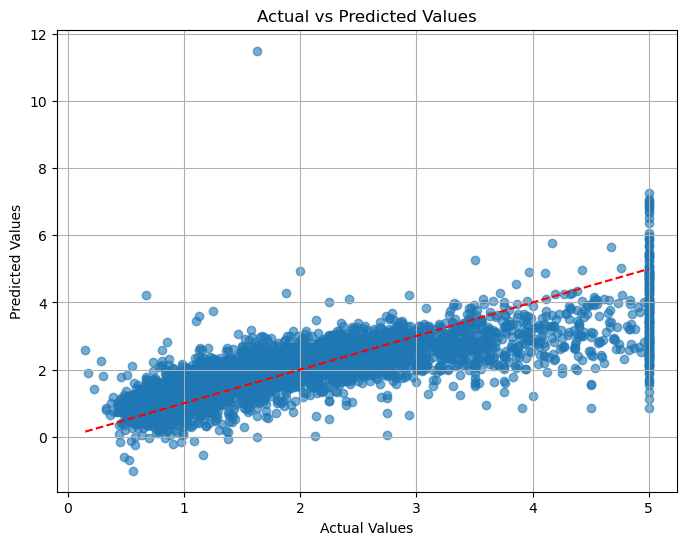

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Linear Regression - Model Building, Evaluation, and Interpretation

## Project Overview

This project demonstrates the implementation of a Linear Regression model using a real-world dataset. The objective is to predict a continuous target variable based on a set of independent features. The analysis includes data preparation, model training, evaluation, and interpretation of the results.

## Dataset

The dataset used is the California Housing dataset from the 1990 U.S. Census, available in `sklearn.datasets`. It contains various socio-economic and housing-related features.

- Target variable: `MedHouseVal` (median house value)
- Features include: median income, house age, average rooms per household, average occupants, and others

## Steps Performed

### 1. Importing Libraries and Loading Data

Necessary libraries for data analysis, modeling, and visualization were imported. The dataset was loaded using scikit-learn and converted to a Pandas DataFrame.

### 2. Data Preprocessing

- Verified that the dataset had no missing values
- Defined the feature matrix `X` and target variable `y`

### 3. Splitting Data into Training and Testing Sets

- Used an 80/20 split to divide the data
- Training data was used to fit the model, and testing data was used for evaluation

### 4. Training the Linear Regression Model

- Fitted a Linear Regression model using `LinearRegression` from `sklearn.linear_model`
- Extracted model coefficients and intercept to understand the influence of each feature on the target

### 5. Model Evaluation

The model was evaluated using the following metrics:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R-squared (R²) Score

These metrics help quantify the difference between predicted and actual values.

### 6. Visualization

Created a scatter plot comparing actual versus predicted values. A reference line representing perfect predictions was used to visually assess model accuracy.

## Key Concepts Explained

### What is Linear Regression?

Linear Regression is a statistical method for modeling the relationship between one dependent variable and one or more independent variables using a linear equation.

### When to Use Linear Regression

Linear Regression is appropriate when the target variable is continuous and there is a linear relationship between inputs and output.

### Why Not Use the Titanic Dataset?

The Titanic dataset is designed for classification, as the target (`Survived`) is binary (0 or 1). Linear Regression is not appropriate for classification problems. A more suitable algorithm for the Titanic dataset would be Logistic Regression.

### Evaluation Metrics Recap

- MAE: Measures the average magnitude of errors without considering their direction
- MSE: Similar to MAE but penalizes larger errors more
- R² Score: Indicates the proportion of variance in the target variable that can be explained by the features

### Interpreting Coefficients

Each coefficient represents the expected change in the target variable for a one-unit increase in the respective feature, assuming all other features remain constant.

For example, a coefficient of 0.4 for `MedInc` implies that, on average, the target variable increases by 0.4 units for every additional unit of median income.